# Reference
 

1.  [Informer2020](https://github.com/zhouhaoyi/Informer2020.git)
2.  [Time Series Forecasting With Deep Learning: A Survey](https://arxiv.org/abs/2004.13408)
3. [Temporal Fusion Transformers for Interpretable Multi-horizon Time Series Forecasting](https://arxiv.org/abs/1912.09363)
4. [Deep Transformer Models for Time Series Forecasting: The Influenza Prevalence Case](https://arxiv.org/abs/2001.08317)

# 1. prepare data

In [ ]:
#!git clone https://github.com/zhouhaoyi/Informer2020.git
!git clone https://github.com/zhouhaoyi/ETDataset.git
!ls

Cloning into 'ETDataset'...
remote: Enumerating objects: 187, done.
remote: Counting objects: 100% (187/187), done.
remote: Compressing objects: 100% (184/184), done.
remote: Total 187 (delta 66), reused 13 (delta 2), pack-reused 0
Receiving objects: 100% (187/187), 3.85 MiB | 20.13 MiB/s, done.
Resolving deltas: 100% (66/66), done.
ETDataset  sample_data


In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt

df1 = pd.read_csv('/content/ETDataset/ETT-small/ETTh1.csv')
#df2 = pd.read_csv('/content/ETDataset/ETT-small/ETTh2.csv')
df1.iloc[:25,:]  # df.iloc[0:25,1:]

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
1,2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
2,2016-07-01 02:00:00,5.157,1.741,1.279,0.355,3.777,1.218,27.787001
3,2016-07-01 03:00:00,5.090,1.942,1.279,0.391,3.807,1.279,25.044001
4,2016-07-01 04:00:00,5.358,1.942,1.492,0.462,3.868,1.279,21.948000
5,2016-07-01 05:00:00,5.626,2.143,1.528,0.533,4.051,1.371,21.174000
6,2016-07-01 06:00:00,7.167,2.947,2.132,0.782,5.026,1.858,22.792000
7,2016-07-01 07:00:00,7.435,3.282,2.310,1.031,5.087,2.224,23.143999
8,2016-07-01 08:00:00,5.559,3.014,2.452,1.173,2.955,1.432,21.667000
9,2016-07-01 09:00:00,4.555,2.545,1.919,0.817,2.680,1.371,17.445999


In [ ]:
df1['year'] = df1.date.str[2:4]
df1['month'] = df1.date.str[5:7]
df1['day'] = df1.date.str[8:10]
df1['hour'] = df1.date.str[11:13]
df1.drop(['date'],axis=1,inplace=True)
df1= df1.apply(pd.to_numeric)
df1= df1[['year', 'month', 'day', 'hour','HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL', 'OT']]
df1

,year,month,day,hour,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,16,7,1,0,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
1,16,7,1,1,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
2,16,7,1,2,5.157,1.741,1.279,0.355,3.777,1.218,27.787001
3,16,7,1,3,5.090,1.942,1.279,0.391,3.807,1.279,25.044001
4,16,7,1,4,5.358,1.942,1.492,0.462,3.868,1.279,21.948000
...,...,...,...,...,...,...,...,...,...,...,...
17415,18,6,26,15,-1.674,3.550,-5.615,2.132,3.472,1.523,10.904000
17416,18,6,26,16,-5.492,4.287,-9.132,2.274,3.533,1.675,11.044000
17417,18,6,26,17,2.813,3.818,-0.817,2.097,3.716,1.523,10.271000
17418,18,6,26,18,9.243,3.818,5.472,2.097,3.655,1.432,9.778000


In [ ]:
normalization = True
if normalization:
    df1_mean, df1_std = df1.mean(), df1.std()
    df1= (df1-df1_mean)/df1_std
    df1

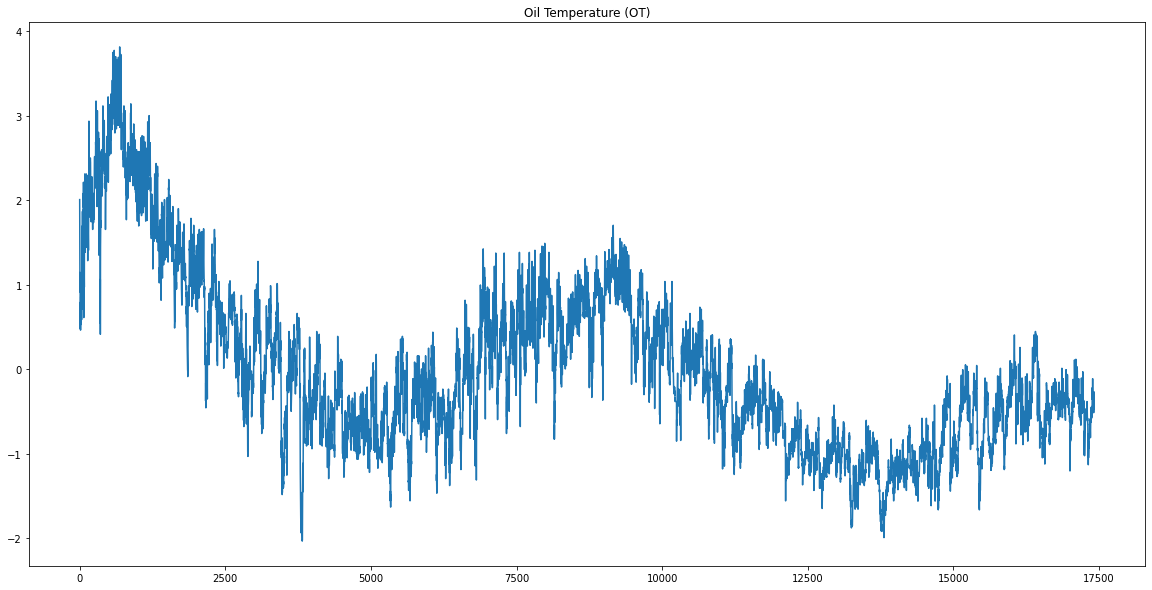

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(df1.OT)
plt.title('Oil Temperature (OT)')
plt.show()

In [ ]:
# adding time lag features
# df1.shift(24)

# 2. Define functions for transformer

We start with building a transformer architecture
by modifying 
https://github.com/pytorch/pytorch/blob/master/torch/nn/modules/transformer.py

## attention

In [ ]:
import copy
from typing import Optional, Any, Tuple

import torch
from torch import Tensor
from torch.nn import functional as F
from torch.nn.init import xavier_uniform_
from torch.nn.init import constant_
from torch.nn.init import xavier_normal_
from torch.nn import Parameter, Module, ModuleList, Linear, Dropout, LayerNorm


class MultiheadAttention(Module):
    r"""Allows the model to jointly attend to information
    from different representation subspaces.
    See `Attention Is All You Need <https://arxiv.org/abs/1706.03762>`_
    .. math::
        \text{MultiHead}(Q, K, V) = \text{Concat}(head_1,\dots,head_h)W^O
    where :math:`head_i = \text{Attention}(QW_i^Q, KW_i^K, VW_i^V)`.
    Args:
        embed_dim: total dimension of the model.
        num_heads: parallel attention heads.
        dropout: a Dropout layer on attn_output_weights. Default: 0.0.
        bias: add bias as module parameter. Default: True.
        add_bias_kv: add bias to the key and value sequences at dim=0.
        add_zero_attn: add a new batch of zeros to the key and
                       value sequences at dim=1.
        kdim: total number of features in key. Default: None.
        vdim: total number of features in value. Default: None.
        batch_first: If ``True``, then the input and output tensors are provided
            as (batch, seq, feature). Default: ``False`` (seq, batch, feature).
    Note that if :attr:`kdim` and :attr:`vdim` are None, they will be set
    to :attr:`embed_dim` such that query, key, and value have the same
    number of features.
    Examples::
        >>> multihead_attn = nn.MultiheadAttention(embed_dim, num_heads)
        >>> attn_output, attn_output_weights = multihead_attn(query, key, value)
    """
    __constants__ = ['batch_first']
    bias_k: Optional[torch.Tensor]
    bias_v: Optional[torch.Tensor]

    def __init__(self, embed_dim, num_heads, dropout=0., bias=True, add_bias_kv=False, add_zero_attn=False,
                 kdim=None, vdim=None, batch_first=False, device=None, dtype=None) -> None:
        factory_kwargs = {'device': device, 'dtype': dtype}
        super(MultiheadAttention, self).__init__()
        self.embed_dim = embed_dim
        self.kdim = kdim if kdim is not None else embed_dim
        self.vdim = vdim if vdim is not None else embed_dim
        self._qkv_same_embed_dim = self.kdim == embed_dim and self.vdim == embed_dim

        self.num_heads = num_heads
        self.dropout = dropout
        self.batch_first = batch_first
        self.head_dim = embed_dim // num_heads
        assert self.head_dim * num_heads == self.embed_dim, "embed_dim must be divisible by num_heads"

        if self._qkv_same_embed_dim is False:
            self.q_proj_weight = Parameter(torch.empty((embed_dim, embed_dim), **factory_kwargs))
            self.k_proj_weight = Parameter(torch.empty((embed_dim, self.kdim), **factory_kwargs))
            self.v_proj_weight = Parameter(torch.empty((embed_dim, self.vdim), **factory_kwargs))
            self.register_parameter('in_proj_weight', None)
        else:
            self.in_proj_weight = Parameter(torch.empty((3 * embed_dim, embed_dim), **factory_kwargs))
            self.register_parameter('q_proj_weight', None)
            self.register_parameter('k_proj_weight', None)
            self.register_parameter('v_proj_weight', None)

        if bias:
            self.in_proj_bias = Parameter(torch.empty(3 * embed_dim, **factory_kwargs))
        else:
            self.register_parameter('in_proj_bias', None)
        self.out_proj = Linear(embed_dim, embed_dim, bias=bias)

        if add_bias_kv:
            self.bias_k = Parameter(torch.empty((1, 1, embed_dim), **factory_kwargs))
            self.bias_v = Parameter(torch.empty((1, 1, embed_dim), **factory_kwargs))
        else:
            self.bias_k = self.bias_v = None

        self.add_zero_attn = add_zero_attn

        self._reset_parameters()

    def _reset_parameters(self):
        if self._qkv_same_embed_dim:
            xavier_uniform_(self.in_proj_weight)
        else:
            xavier_uniform_(self.q_proj_weight)
            xavier_uniform_(self.k_proj_weight)
            xavier_uniform_(self.v_proj_weight)

        if self.in_proj_bias is not None:
            constant_(self.in_proj_bias, 0.)
            constant_(self.out_proj.bias, 0.)
        if self.bias_k is not None:
            xavier_normal_(self.bias_k)
        if self.bias_v is not None:
            xavier_normal_(self.bias_v)

    def __setstate__(self, state):
        # Support loading old MultiheadAttention checkpoints generated by v1.1.0
        if '_qkv_same_embed_dim' not in state:
            state['_qkv_same_embed_dim'] = True

        super(MultiheadAttention, self).__setstate__(state)

    def forward(self, query: Tensor, key: Tensor, value: Tensor, key_padding_mask: Optional[Tensor] = None,
                need_weights: bool = True, attn_mask: Optional[Tensor] = None) -> Tuple[Tensor, Optional[Tensor]]:
        r"""
    Args:
        query, key, value: map a query and a set of key-value pairs to an output.
            See "Attention Is All You Need" for more details.
        key_padding_mask: if provided, specified padding elements in the key will
            be ignored by the attention. When given a binary mask and a value is True,
            the corresponding value on the attention layer will be ignored. When given
            a byte mask and a value is non-zero, the corresponding value on the attention
            layer will be ignored
        need_weights: output attn_output_weights.
        attn_mask: 2D or 3D mask that prevents attention to certain positions. A 2D mask will be broadcasted for all
            the batches while a 3D mask allows to specify a different mask for the entries of each batch.
    Shapes for inputs:
        - query: :math:`(L, N, E)` where L is the target sequence length, N is the batch size, E is
          the embedding dimension. :math:`(N, L, E)` if ``batch_first`` is ``True``.
        - key: :math:`(S, N, E)`, where S is the source sequence length, N is the batch size, E is
          the embedding dimension. :math:`(N, S, E)` if ``batch_first`` is ``True``.
        - value: :math:`(S, N, E)` where S is the source sequence length, N is the batch size, E is
          the embedding dimension. :math:`(N, S, E)` if ``batch_first`` is ``True``.
        - key_padding_mask: :math:`(N, S)` where N is the batch size, S is the source sequence length.
          If a ByteTensor is provided, the non-zero positions will be ignored while the position
          with the zero positions will be unchanged. If a BoolTensor is provided, the positions with the
          value of ``True`` will be ignored while the position with the value of ``False`` will be unchanged.
        - attn_mask: if a 2D mask: :math:`(L, S)` where L is the target sequence length, S is the
          source sequence length.
          If a 3D mask: :math:`(N\cdot\text{num\_heads}, L, S)` where N is the batch size, L is the target sequence
          length, S is the source sequence length. ``attn_mask`` ensure that position i is allowed to attend
          the unmasked positions. If a ByteTensor is provided, the non-zero positions are not allowed to attend
          while the zero positions will be unchanged. If a BoolTensor is provided, positions with ``True``
          is not allowed to attend while ``False`` values will be unchanged. If a FloatTensor
          is provided, it will be added to the attention weight.
    Shapes for outputs:
        - attn_output: :math:`(L, N, E)` where L is the target sequence length, N is the batch size,
          E is the embedding dimension. :math:`(N, L, E)` if ``batch_first`` is ``True``.
        - attn_output_weights: :math:`(N, L, S)` where N is the batch size,
          L is the target sequence length, S is the source sequence length.
        """
        if self.batch_first:
            query, key, value = [x.transpose(1, 0) for x in (query, key, value)]

        if not self._qkv_same_embed_dim:
            attn_output, attn_output_weights = F.multi_head_attention_forward(
                query, key, value, self.embed_dim, self.num_heads,
                self.in_proj_weight, self.in_proj_bias,
                self.bias_k, self.bias_v, self.add_zero_attn,
                self.dropout, self.out_proj.weight, self.out_proj.bias,
                training=self.training,
                key_padding_mask=key_padding_mask, need_weights=need_weights,
                attn_mask=attn_mask, use_separate_proj_weight=True,
                q_proj_weight=self.q_proj_weight, k_proj_weight=self.k_proj_weight,
                v_proj_weight=self.v_proj_weight)
        else:
            attn_output, attn_output_weights = F.multi_head_attention_forward(
                query, key, value, self.embed_dim, self.num_heads,
                self.in_proj_weight, self.in_proj_bias,
                self.bias_k, self.bias_v, self.add_zero_attn,
                self.dropout, self.out_proj.weight, self.out_proj.bias,
                training=self.training,
                key_padding_mask=key_padding_mask, need_weights=need_weights,
                attn_mask=attn_mask)
        if self.batch_first:
            return attn_output.transpose(1, 0), attn_output_weights
        else:
            return attn_output, attn_output_weights


In [ ]:
#Step 1 run original code and debug
from dill.source import getsource
#print(getsource(Linear)) 

# There is no device or dtype for Linear and LayerNorm
# Solution: remove {, **factory_kwargs}

## Positional encoding

In [ ]:
# how to use positional encoding 
# https://pytorch.org/tutorials/beginner/transformer_tutorial.html
from typing import Optional, Union
import numpy as np
import torch
def original_PE(length: int, d_model: int) -> torch.Tensor:
    """Generate positional encoding as described in original paper.  :class:`torch.Tensor`
    Parameters
    ----------
    length:
        Time window length, i.e. K.
    d_model:
        Dimension of the model vector.(number of features)
    Returns
    -------
        Tensor of shape (K, d_model).
    """
    PE = torch.zeros((length, d_model))

    pos = torch.arange(length).unsqueeze(1)
    PE[:, 0::2] = torch.sin(
        pos / torch.pow(1000, torch.arange(0, d_model, 2, dtype=torch.float32)/d_model))
    PE[:, 1::2] = torch.cos(
        pos / torch.pow(1000, torch.arange(1, d_model, 2, dtype=torch.float32)/d_model))

    return PE

original_PE(length=4, d_model=7)

tensor([[0.0000, 1.0000, 0.0000, 1.0000, 0.0000, 1.0000, 0.0000],
        [0.8415, 0.9313, 0.1385, 0.9987, 0.0193, 1.0000, 0.0027],
        [0.9093, 0.7347, 0.2743, 0.9946, 0.0386, 0.9999, 0.0054],
        [0.1411, 0.4372, 0.4049, 0.9880, 0.0579, 0.9998, 0.0080]])

## transformer

In [ ]:
import copy
from typing import Optional, Any, Tuple

import torch
from torch import Tensor
#from torch.nn.modules.activation import MultiheadAttention
from torch.nn import functional as F
from torch.nn.init import xavier_uniform_
from torch.nn.init import constant_
from torch.nn.init import xavier_normal_
from torch.nn import Parameter, Module, ModuleList, Linear, Dropout, LayerNorm




class TimeTransformer(Module):
    r"""A transformer model. User is able to modify the attributes as needed. The architecture
    is based on the paper "Attention Is All You Need". Ashish Vaswani, Noam Shazeer,
    Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N Gomez, Lukasz Kaiser, and
    Illia Polosukhin. 2017. Attention is all you need. In Advances in Neural Information
    Processing Systems, pages 6000-6010. Users can build the BERT(https://arxiv.org/abs/1810.04805)
    model with corresponding parameters.

    Args:
        d_linear: output size of attention used to linear combine.
        d_model: the number of expected features in the encoder/decoder inputs (default=512).
        nhead: the number of heads in the multiheadattention models (default=8).
        num_encoder_layers: the number of sub-encoder-layers in the encoder (default=6).
        num_decoder_layers: the number of sub-decoder-layers in the decoder (default=6).
        dim_feedforward: the dimension of the feedforward network model (default=2048).
        dropout: the dropout value (default=0.1).
        activation: the activation function of encoder/decoder intermediate layer, relu or gelu (default=relu).
        custom_encoder: custom encoder (default=None).
        custom_decoder: custom decoder (default=None).
        layer_norm_eps: the eps value in layer normalization components (default=1e-5).
        batch_first: If ``True``, then the input and output tensors are provided
            as (batch, seq, feature). Default: ``False`` (seq, batch, feature).

    Examples::
        >>> transformer_model = TimeTransformer(nhead=16, num_encoder_layers=12)
        >>> src = torch.rand((10, 32, 512))
        >>> tgt = torch.rand((20, 32, 512))
        >>> out = transformer_model(src, tgt)

    Note: A full example to apply nn.Transformer module for the word language model is available in
    https://github.com/pytorch/examples/tree/master/word_language_model
    """

    def __init__(self, d_linear: int = 10, d_model: int = 512, d_out: int = 512, nhead: int = 8, num_encoder_layers: int = 6,
                 num_decoder_layers: int = 6, dim_feedforward: int = 2048, dropout: float = 0.05,
                 activation: str = "gelu", custom_encoder: Optional[Any] = None, custom_decoder: Optional[Any] = None,
                 layer_norm_eps: float = 1e-5, batch_first: bool = False, linear_end: bool = False,
                 device=None, dtype=None) -> None:
        factory_kwargs = {'device': device, 'dtype': dtype}
        super(TimeTransformer, self).__init__()

        if custom_encoder is not None:
            self.encoder = custom_encoder
        else:
            encoder_layer = TransformerEncoderLayer(d_model, nhead, dim_feedforward, dropout,
                                                    activation, layer_norm_eps, batch_first,
                                                    **factory_kwargs)
            encoder_norm = LayerNorm(d_model, eps=layer_norm_eps)
            self.encoder = TransformerEncoder(encoder_layer, num_encoder_layers, encoder_norm)

        if custom_decoder is not None:
            self.decoder = custom_decoder
        else:
            decoder_layer = TransformerDecoderLayer(d_model, nhead, dim_feedforward, dropout,
                                                    activation, layer_norm_eps, batch_first,
                                                    **factory_kwargs)
            decoder_norm = LayerNorm(d_model, eps=layer_norm_eps)
            self.decoder = TransformerDecoder(decoder_layer, num_decoder_layers, decoder_norm)
        self.linear = torch.nn.Linear(d_model, d_out, bias=True)
        self.linear_time_augment = torch.nn.Linear(d_linear, d_out, bias=True)
        self._reset_parameters()

        self.d_model = d_model
        self.d_out = d_out
        self.nhead = nhead
        self.d_linear = d_linear

        self.batch_first = batch_first
        self.linear_end = linear_end

    def forward(self, src: Tensor, tgt: Tensor, src_mask: Optional[Tensor] = None, tgt_mask: Optional[Tensor] = None,
                memory_mask: Optional[Tensor] = None, src_key_padding_mask: Optional[Tensor] = None,
                tgt_key_padding_mask: Optional[Tensor] = None, memory_key_padding_mask: Optional[Tensor] = None) -> Tensor:
        r"""Take in and process masked source/target sequences.

        Args:
            src: the sequence to the encoder (required).
            tgt: the sequence to the decoder (required).
            src_mask: the additive mask for the src sequence (optional).
            tgt_mask: the additive mask for the tgt sequence (optional).
            memory_mask: the additive mask for the encoder output (optional).
            src_key_padding_mask: the ByteTensor mask for src keys per batch (optional).
            tgt_key_padding_mask: the ByteTensor mask for tgt keys per batch (optional).
            memory_key_padding_mask: the ByteTensor mask for memory keys per batch (optional).

        Shape:
            - src: :math:`(S, N, E)`, `(N, S, E)` if batch_first.
            - tgt: :math:`(T, N, E)`, `(N, T, E)` if batch_first.
            - src_mask: :math:`(S, S)`.
            - tgt_mask: :math:`(T, T)`.
            - memory_mask: :math:`(T, S)`.
            - src_key_padding_mask: :math:`(N, S)`.
            - tgt_key_padding_mask: :math:`(N, T)`.
            - memory_key_padding_mask: :math:`(N, S)`.

            Note: [src/tgt/memory]_mask ensures that position i is allowed to attend the unmasked
            positions. If a ByteTensor is provided, the non-zero positions are not allowed to attend
            while the zero positions will be unchanged. If a BoolTensor is provided, positions with ``True``
            are not allowed to attend while ``False`` values will be unchanged. If a FloatTensor
            is provided, it will be added to the attention weight.
            [src/tgt/memory]_key_padding_mask provides specified elements in the key to be ignored by
            the attention. If a ByteTensor is provided, the non-zero positions will be ignored while the zero
            positions will be unchanged. If a BoolTensor is provided, the positions with the
            value of ``True`` will be ignored while the position with the value of ``False`` will be unchanged.

            - output: :math:`(T, N, E)`, `(N, T, E)` if batch_first.

            Note: Due to the multi-head attention architecture in the transformer model,
            the output sequence length of a transformer is same as the input sequence
            (i.e. target) length of the decode.

            where S is the source sequence length, T is the target sequence length, N is the
            batch size, E is the feature number

        Examples:
            >>> output = transformer_model(src, tgt, src_mask=src_mask, tgt_mask=tgt_mask)
        """

        if not self.batch_first and src.size(1) != tgt.size(1):
            raise RuntimeError("the batch number of src and tgt must be equal")
        elif self.batch_first and src.size(0) != tgt.size(0):
            raise RuntimeError("the batch number of src and tgt must be equal")

        if src.size(2) != self.d_model or tgt.size(2) != self.d_model:
            raise RuntimeError("the feature number of src and tgt must be equal to d_model")

        memory = self.encoder(src, mask=src_mask, src_key_padding_mask=src_key_padding_mask)
        output = self.decoder(tgt, memory, tgt_mask=tgt_mask, memory_mask=memory_mask,
                              tgt_key_padding_mask=tgt_key_padding_mask,
                              memory_key_padding_mask=memory_key_padding_mask)
        # combining data at different time
        # swap time and feature index
        if self.batch_first:
            time_ind, fea_ind = 1, 2
        else:
            time_ind, fea_ind = 0, 2
        # print(output.shape)
        if self.linear_end:
            output = self.linear(output).transpose(time_ind, fea_ind)
            #print(output.shape)
            output= self.linear_time_augment(output)
        return output

    def generate_square_subsequent_mask(self, sz: int) -> Tensor:
        r"""Generate a square mask for the sequence. The masked positions are filled with float('-inf').
            Unmasked positions are filled with float(0.0).
        """
        mask = (torch.triu(torch.ones(sz, sz)) == 1).transpose(0, 1)
        mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
        return mask

    def _reset_parameters(self):
        r"""Initiate parameters in the transformer model."""

        for p in self.parameters():
            if p.dim() > 1:
                xavier_uniform_(p)


class TransformerEncoder(Module):
    r"""TransformerEncoder is a stack of N encoder layers

    Args:
        encoder_layer: an instance of the TransformerEncoderLayer() class (required).
        num_layers: the number of sub-encoder-layers in the encoder (required).
        norm: the layer normalization component (optional).

    Examples::
        >>> encoder_layer = nn.TransformerEncoderLayer(d_model=512, nhead=8)
        >>> transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=6)
        >>> src = torch.rand(10, 32, 512)
        >>> out = transformer_encoder(src)
    """
    __constants__ = ['norm']

    def __init__(self, encoder_layer, num_layers, norm=None):
        super(TransformerEncoder, self).__init__()
        self.layers = _get_clones(encoder_layer, num_layers)
        self.num_layers = num_layers
        self.norm = norm

    def forward(self, src: Tensor, mask: Optional[Tensor] = None, src_key_padding_mask: Optional[Tensor] = None) -> Tensor:
        r"""Pass the input through the encoder layers in turn.

        Args:
            src: the sequence to the encoder (required).
            mask: the mask for the src sequence (optional).
            src_key_padding_mask: the mask for the src keys per batch (optional).

        Shape:
            see the docs in Transformer class.
        """
        output = src

        for mod in self.layers:
            output = mod(output, src_mask=mask, src_key_padding_mask=src_key_padding_mask)

        if self.norm is not None:
            output = self.norm(output)

        return output


class TransformerDecoder(Module):
    r"""TransformerDecoder is a stack of N decoder layers

    Args:
        decoder_layer: an instance of the TransformerDecoderLayer() class (required).
        num_layers: the number of sub-decoder-layers in the decoder (required).
        norm: the layer normalization component (optional).

    Examples::
        >>> decoder_layer = nn.TransformerDecoderLayer(d_model=512, nhead=8)
        >>> transformer_decoder = nn.TransformerDecoder(decoder_layer, num_layers=6)
        >>> memory = torch.rand(10, 32, 512)
        >>> tgt = torch.rand(20, 32, 512)
        >>> out = transformer_decoder(tgt, memory)
    """
    __constants__ = ['norm']

    def __init__(self, decoder_layer, num_layers, norm=None):
        super(TransformerDecoder, self).__init__()
        self.layers = _get_clones(decoder_layer, num_layers)
        self.num_layers = num_layers
        self.norm = norm

    def forward(self, tgt: Tensor, memory: Tensor, tgt_mask: Optional[Tensor] = None,
                memory_mask: Optional[Tensor] = None, tgt_key_padding_mask: Optional[Tensor] = None,
                memory_key_padding_mask: Optional[Tensor] = None) -> Tensor:
        r"""Pass the inputs (and mask) through the decoder layer in turn.

        Args:
            tgt: the sequence to the decoder (required).
            memory: the sequence from the last layer of the encoder (required).
            tgt_mask: the mask for the tgt sequence (optional).
            memory_mask: the mask for the memory sequence (optional).
            tgt_key_padding_mask: the mask for the tgt keys per batch (optional).
            memory_key_padding_mask: the mask for the memory keys per batch (optional).

        Shape:
            see the docs in Transformer class.
        """
        output = tgt

        for mod in self.layers:
            output = mod(output, memory, tgt_mask=tgt_mask,
                         memory_mask=memory_mask,
                         tgt_key_padding_mask=tgt_key_padding_mask,
                         memory_key_padding_mask=memory_key_padding_mask)

        if self.norm is not None:
            output = self.norm(output)

        return output

class TransformerEncoderLayer(Module):
    r"""TransformerEncoderLayer is made up of self-attn and feedforward network.
    This standard encoder layer is based on the paper "Attention Is All You Need".
    Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N Gomez,
    Lukasz Kaiser, and Illia Polosukhin. 2017. Attention is all you need. In Advances in
    Neural Information Processing Systems, pages 6000-6010. Users may modify or implement
    in a different way during application.

    Args:
        d_model: the number of expected features in the input (required).
        nhead: the number of heads in the multiheadattention models (required).
        dim_feedforward: the dimension of the feedforward network model (default=2048).
        dropout: the dropout value (default=0.1).
        activation: the activation function of intermediate layer, relu or gelu (default=relu).
        layer_norm_eps: the eps value in layer normalization components (default=1e-5).
        batch_first: If ``True``, then the input and output tensors are provided
            as (batch, seq, feature). Default: ``False``.

    Examples::
        >>> encoder_layer = nn.TransformerEncoderLayer(d_model=512, nhead=8)
        >>> src = torch.rand(10, 32, 512)
        >>> out = encoder_layer(src)

    Alternatively, when ``batch_first`` is ``True``:
        >>> encoder_layer = nn.TransformerEncoderLayer(d_model=512, nhead=8, batch_first=True)
        >>> src = torch.rand(32, 10, 512)
        >>> out = encoder_layer(src)
    """
    __constants__ = ['batch_first']

    def __init__(self, d_model, nhead, dim_feedforward=2048, dropout=0.1, activation="gelu",
                 layer_norm_eps=1e-5, batch_first=False,
                 device=None, dtype=None) -> None:
        factory_kwargs = {'device': device, 'dtype': dtype}
        super(TransformerEncoderLayer, self).__init__()

        
        self.self_attn = MultiheadAttention(d_model, nhead, dropout=dropout, batch_first=batch_first,
                                            **factory_kwargs)
        # Implementation of Feedforward model
        self.linear1 = Linear(d_model, dim_feedforward)
        self.dropout = Dropout(dropout)
        self.linear2 = Linear(dim_feedforward, d_model)

        self.norm1 = LayerNorm(d_model, eps=layer_norm_eps)
        self.norm2 = LayerNorm(d_model, eps=layer_norm_eps)
        self.dropout1 = Dropout(dropout)
        self.dropout2 = Dropout(dropout)

        self.activation = _get_activation_fn(activation)

    def __setstate__(self, state):
        if 'activation' not in state:
            state['activation'] = F.gelu
        super(TransformerEncoderLayer, self).__setstate__(state)

    def forward(self, src: Tensor, src_mask: Optional[Tensor] = None, src_key_padding_mask: Optional[Tensor] = None) -> Tensor:
        r"""Pass the input through the encoder layer.

        Args:
            src: the sequence to the encoder layer (required).
            src_mask: the mask for the src sequence (optional).
            src_key_padding_mask: the mask for the src keys per batch (optional).

        Shape:
            see the docs in Transformer class.
        """
        
        src2 = self.self_attn(src, src, src, attn_mask=src_mask,
                              key_padding_mask=src_key_padding_mask)[0]
        src = src + self.dropout1(src2)
        src = self.norm1(src)
        src2 = self.linear2(self.dropout(self.activation(self.linear1(src))))
        src = src + self.dropout2(src2)
        src = self.norm2(src)
        return src


class TransformerDecoderLayer(Module):
    r"""TransformerDecoderLayer is made up of self-attn, multi-head-attn and feedforward network.
    This standard decoder layer is based on the paper "Attention Is All You Need".
    Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N Gomez,
    Lukasz Kaiser, and Illia Polosukhin. 2017. Attention is all you need. In Advances in
    Neural Information Processing Systems, pages 6000-6010. Users may modify or implement
    in a different way during application.

    Args:
        d_model: the number of expected features in the input (required).
        nhead: the number of heads in the multiheadattention models (required).
        dim_feedforward: the dimension of the feedforward network model (default=2048).
        dropout: the dropout value (default=0.1).
        activation: the activation function of intermediate layer, relu or gelu (default=relu).
        layer_norm_eps: the eps value in layer normalization components (default=1e-5).
        batch_first: If ``True``, then the input and output tensors are provided
            as (batch, seq, feature). Default: ``False``.

    Examples::
        >>> decoder_layer = nn.TransformerDecoderLayer(d_model=512, nhead=8)
        >>> memory = torch.rand(10, 32, 512)
        >>> tgt = torch.rand(20, 32, 512)
        >>> out = decoder_layer(tgt, memory)

    Alternatively, when ``batch_first`` is ``True``:
        >>> decoder_layer = nn.TransformerDecoderLayer(d_model=512, nhead=8, batch_first=True)
        >>> memory = torch.rand(32, 10, 512)
        >>> tgt = torch.rand(32, 20, 512)
        >>> out = decoder_layer(tgt, memory)
    """
    __constants__ = ['batch_first']

    def __init__(self, d_model, nhead, dim_feedforward=2048, dropout=0.1, activation="relu",
                 layer_norm_eps=1e-5, batch_first=False, device=None, dtype=None) -> None:
        factory_kwargs = {'device': device, 'dtype': dtype}
        super(TransformerDecoderLayer, self).__init__()

        
        self.self_attn = MultiheadAttention(d_model, nhead, dropout=dropout, batch_first=batch_first,
                                            **factory_kwargs)
        self.multihead_attn = MultiheadAttention(d_model, nhead, dropout=dropout, batch_first=batch_first,
                                                 **factory_kwargs)
        # Implementation of Feedforward model
        self.linear1 = Linear(d_model, dim_feedforward)
        self.dropout = Dropout(dropout)
        self.linear2 = Linear(dim_feedforward, d_model)

        self.norm1 = LayerNorm(d_model, eps=layer_norm_eps)
        self.norm2 = LayerNorm(d_model, eps=layer_norm_eps)
        self.norm3 = LayerNorm(d_model, eps=layer_norm_eps)
        self.dropout1 = Dropout(dropout)
        self.dropout2 = Dropout(dropout)
        self.dropout3 = Dropout(dropout)

        self.activation = _get_activation_fn(activation)

    def __setstate__(self, state):
        if 'activation' not in state:
            state['activation'] = F.gelu
        super(TransformerDecoderLayer, self).__setstate__(state)

    def forward(self, tgt: Tensor, memory: Tensor, tgt_mask: Optional[Tensor] = None, memory_mask: Optional[Tensor] = None,
                tgt_key_padding_mask: Optional[Tensor] = None, memory_key_padding_mask: Optional[Tensor] = None) -> Tensor:
        r"""Pass the inputs (and mask) through the decoder layer.

        Args:
            tgt: the sequence to the decoder layer (required).
            memory: the sequence from the last layer of the encoder (required).
            tgt_mask: the mask for the tgt sequence (optional).
            memory_mask: the mask for the memory sequence (optional).
            tgt_key_padding_mask: the mask for the tgt keys per batch (optional).
            memory_key_padding_mask: the mask for the memory keys per batch (optional).

        Shape:
            see the docs in Transformer class.
        """
        
        tgt2 = self.self_attn(tgt, tgt, tgt, attn_mask=tgt_mask,
                              key_padding_mask=tgt_key_padding_mask)[0]
        tgt = tgt + self.dropout1(tgt2)
        tgt = self.norm1(tgt)
        tgt2 = self.multihead_attn(tgt, memory, memory, attn_mask=memory_mask,
                                   key_padding_mask=memory_key_padding_mask)[0]
        tgt = tgt + self.dropout2(tgt2)
        tgt = self.norm2(tgt)
        tgt2 = self.linear2(self.dropout(self.activation(self.linear1(tgt))))
        tgt = tgt + self.dropout3(tgt2)
        tgt = self.norm3(tgt)
        return tgt


def _get_clones(module, N):
    return ModuleList([copy.deepcopy(module) for i in range(N)])


def _get_activation_fn(activation):
    if activation == "relu":
        return F.relu
    elif activation == "gelu":
        return F.gelu

    raise RuntimeError("activation should be relu/gelu, not {}".format(activation))


# 3. Dataclass for torch transformer

### convert to float32

- only target time series OT

In [ ]:
# df1.iloc[:,1:].to_numpy().dtype  # float64 is not compatible with pytorch linear layer
import numpy as np
df = np.float32(df1.iloc[:,-1].to_numpy())
print(df.dtype) 
df = np.expand_dims(df, 1)
df.shape

float32


(17420, 1)

- including all features

In [ ]:
# df1.iloc[:,1:].to_numpy().dtype  # float64 is not compatible with pytorch linear layer
import numpy as np
df = np.float32(df1.to_numpy())
print(df.dtype) 
df.shape

float32


(17420, 11)

In [ ]:
df

array([[-1.4043839 ,  0.13620798, -1.6705035 , ...,  0.9763265 ,
         0.80571496,  2.0084553 ],
       [-1.4043839 ,  0.13620798, -1.6705035 , ...,  0.92394394,
         0.85742027,  1.6881545 ],
       [-1.4043839 ,  0.13620798, -1.6705035 , ...,  0.61050606,
         0.60222965,  1.6881545 ],
       ...,
       [ 1.4323934 , -0.15300985,  1.1806208 , ...,  0.55812347,
         1.110943  , -0.35644808],
       [ 1.4323934 , -0.15300985,  1.1806208 , ...,  0.50574064,
         0.95916295, -0.41399485],
       [ 1.4323934 , -0.15300985,  1.1806208 , ...,  0.55812347,
         1.0092002 , -0.43862435]], dtype=float32)

In [ ]:
train = df[0:13000,:]
time_step =7*24+1  # 24*k +1 since we use hourly data
test = df[13000-time_step+1:,:]

In [ ]:
# check the first we want to predict is the 13000th
test[time_step-1,:] == df[13000,:]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [ ]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, data_array, time_step):
        self.data = data_array
        self.time_step = time_step

    def __getitem__(self, idx):  # idx runs from 0 to __len__(self)
        return self.data[idx:idx+self.time_step,:]

    def __len__(self): # The number of samples we can generate = total time - time_step + 1
        return len(self.data[:,0]) - self.time_step+1

# test Dataset with an example
# time_step = 3 
# traindata = Dataset(train, time_step)
# print('total length: ',len(traindata))
# train_loader = torch.utils.data.DataLoader(traindata, batch_size=2, shuffle=False)
# #next(iter(train_loader))
# i = 0
# for x in train_loader:
#     i += 1
#     print('Input [%d] : \n' %i, x)
#     print(x.dtype)
#     print(x[:,:-1,:],'\n', x[:,-1:,:]) # take out the input [x_1 to x_t] and [x_{t+1}]
#     if i>0:
#         print('dimension: ', x.shape)
#         break

In [ ]:

batch_size = 64
traindata = Dataset(train, time_step)
train_loader = torch.utils.data.DataLoader(traindata, batch_size=batch_size, shuffle=False, drop_last=True )
# drop_last is not good but has to do it if len(traindata) is not divisible by batch

testdata = Dataset(test, time_step)
test_loader = torch.utils.data.DataLoader(testdata, batch_size=batch_size, shuffle=False, drop_last=True )

# 4- Modeling and Training (time attention)

    Args: 
    
        d_linear: output size of attention used to linear combine (same as total number of features in any specific time).
        d_model: the number of expected features in the encoder/decoder inputs (default=512).
        nhead: the number of heads in the multiheadattention models (default=8).
        num_encoder_layers: the number of sub-encoder-layers in the encoder (default=6).
        num_decoder_layers: the number of sub-decoder-layers in the decoder (default=6).
        dim_feedforward: the dimension of the feedforward network model (default=2048).
        dropout: the dropout value (default=0.1).
        activation: the activation function of encoder/decoder intermediate layer, relu or gelu (default=relu).
        custom_encoder: custom encoder (default=None).
        custom_decoder: custom decoder (default=None).
        layer_norm_eps: the eps value in layer normalization components (default=1e-5).
        batch_first: If ``True``, then the input and output tensors are provided
            as (batch, seq, feature). Default: ``False`` (seq, batch, feature).

    Examples::
        >>> transformer_model = TimeTransformer(nhead=16, num_encoder_layers=12)
        >>> src = torch.rand((10, 32, 512))
        >>> tgt = torch.rand((20, 32, 512))
        >>> out = transformer_model(src, tgt)

### Training 0 (LINEAR_END = False)

 This has the old time as deconding feature (no current time information)


- Training setup

In [ ]:
# we want attention performed on the time-axis, i.e. data attend history
model = TimeTransformer(d_linear = 11, # dim of attention output used as input for linear layer
                        nhead=1,
                        d_model= time_step-1, #attention head size
                        d_out = 1,
                        dim_feedforward = time_step-1,
                        num_encoder_layers=3, 
                        num_decoder_layers=2,
                        dropout=0.1,
                        linear_end = False,
                        batch_first=True)  #  input and output dim = (batch, seq, feature)
if torch.cuda.is_available():
    model.cuda()


# empty cache
torch.cuda.empty_cache() 
# keep track of loss during training
losses = []

In [ ]:
# run multiple times until loss does not drop
num_epochs = 10
learning_rate = 1e-6
loss = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
# attend to history data
for epoch in range(num_epochs):
    for i, x in enumerate(train_loader):   # Load a batch with its (index, )
        # x has dimension [batch, time, feature]
        if torch.cuda.is_available():
            x = x.cuda()
        x_out = x[:,-1:,-1:].detach().clone() # use most recent time 'OT' as output
        x_in_enc = x[:,:-1,:].transpose(1,2) # drop most recent time data, swap time and feature

        optimizer.zero_grad()                             # Intialize the hidden weight to all zeros
        outputs = model(x_in_enc, x_in_enc )[:,-1:,-1:]                             # Forward pass: compute the output class given a image
        error = loss(outputs, x_out)                 # Compute the loss: difference between the output class and the pre-given label
        error.backward()                                   # Backward pass: compute the weight
        optimizer.step()                                  # Optimizer: update the weights of hidden nodes

        losses.append(error.detach().to("cpu").item())

        if (i) % 100 == 0:                              # Logging
            print('Epoch [%d/%d], Step [%d/%d], Loss: %.6f'
                  %(epoch+1, num_epochs, i+1, len(traindata)//batch_size, error.item()))


Epoch [1/10], Step [1/200], Loss: 0.335419
Epoch [1/10], Step [101/200], Loss: 0.063270
Epoch [2/10], Step [1/200], Loss: 0.360242
Epoch [2/10], Step [101/200], Loss: 0.067137
Epoch [3/10], Step [1/200], Loss: 0.296694
Epoch [3/10], Step [101/200], Loss: 0.059343
Epoch [4/10], Step [1/200], Loss: 0.353437
Epoch [4/10], Step [101/200], Loss: 0.060183
Epoch [5/10], Step [1/200], Loss: 0.420119
Epoch [5/10], Step [101/200], Loss: 0.044421
Epoch [6/10], Step [1/200], Loss: 0.291867
Epoch [6/10], Step [101/200], Loss: 0.054884
Epoch [7/10], Step [1/200], Loss: 0.372489
Epoch [7/10], Step [101/200], Loss: 0.065190
Epoch [8/10], Step [1/200], Loss: 0.380841
Epoch [8/10], Step [101/200], Loss: 0.059245
Epoch [9/10], Step [1/200], Loss: 0.349591
Epoch [9/10], Step [101/200], Loss: 0.060099
Epoch [10/10], Step [1/200], Loss: 0.379022
Epoch [10/10], Step [101/200], Loss: 0.061493


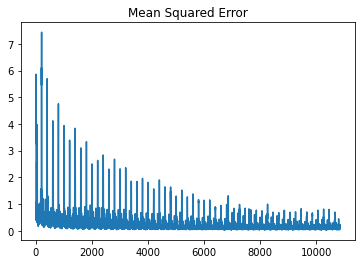

In [ ]:
plt.plot(losses)
plt.title("Mean Squared Error")
plt.show()

- Test

first predicted hour tensor([[0.0140, 1.5823, 0.9525, 0.6505]], device='cuda:0')
is equal to  [0.01400476 1.5822971  0.9525308  0.6504798 ]
Epoch [10/10], Step [10/69], Loss: 0.1227
Epoch [10/10], Step [20/69], Loss: 0.3846
Epoch [10/10], Step [30/69], Loss: 0.0754
Epoch [10/10], Step [40/69], Loss: 0.0856
Epoch [10/10], Step [50/69], Loss: 0.0910
Epoch [10/10], Step [60/69], Loss: 0.2603


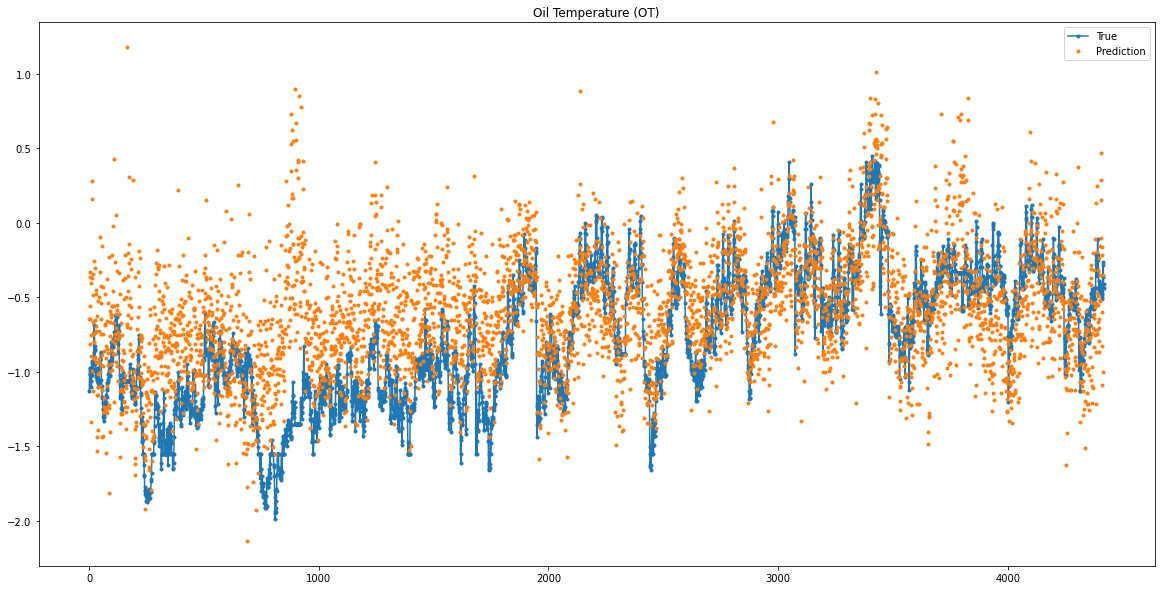

In [ ]:
test_pred = np.empty(0,dtype='float32')
test_loss = []
for i, x in enumerate(test_loader):   # Load a batch of images with its (index, )
    if torch.cuda.is_available():
        x = x.cuda()
    if i == 0:
        first_pred_time = x[0,-1:,:4]
        print('first predicted hour', first_pred_time) # get first predicted time data 
        print('is equal to ', df[13000,:4])
    x_out = x[:,-1:,-1:].detach().clone() # use most recent time 'OT' as output
    x_in_enc = x[:,:-1,:].transpose(1,2) # drop most recent time data, swap time and feature

    predict = model(x_in_enc, x_in_enc )[:,-1:,-1:]                  #  compute the output class given an input
    error = loss(predict, x_out)              # Compute the loss: difference between the output and the pre-given label
    test_loss.append(error.detach().to("cpu").item())
    x = predict.detach().to("cpu").squeeze().numpy()
    test_pred = np.concatenate((test_pred, x))

    if (i+1) % 10 == 0:                              # Logging
        print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                %(epoch+1, num_epochs, i+1, len(testdata)//batch_size, error.item()))    
test_true = df[13000:,-1:]
t = 0
plt.figure(figsize=(20,10))
plt.plot(test_true[t:],'.-', label='True')
plt.plot(test_pred[t:],'.', label='Prediction')
plt.title('Oil Temperature (OT)')
plt.legend()
plt.show()

# plt.plot(test_loss)
# plt.title('One-hour-ahead-prediction error (batchsize=64)')
# plt.show()

### Training 0-1 (LINEAR_END = False)

 This include current time as deconding feature


- Training setup

In [ ]:
# we want attention performed on the time-axis, i.e. data attend history
model = TimeTransformer(d_linear = 11, # dim of attention output used as input for linear layer
                        nhead=1,
                        d_model= time_step-1, #attention head size
                        d_out = 1,
                        dim_feedforward = time_step-1,
                        num_encoder_layers=3, 
                        num_decoder_layers=2,
                        dropout=0,
                        linear_end = False,
                        batch_first=True)  #  input and output dim = (batch, seq, feature)
if torch.cuda.is_available():
    model.cuda()


# empty cache
torch.cuda.empty_cache() 
# keep track of loss during training
losses = []

In [ ]:
num_epochs = 10
learning_rate = 1e-5
loss = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
# attend to history data
for epoch in range(num_epochs):
    for i, x in enumerate(train_loader):   # Load a batch with its (index, )
        # x has dimension [batch, time, feature]
        if torch.cuda.is_available():
            x = x.cuda()
        x_out = x[:,-1:,-1:].detach().clone() # use most recent time 'OT' as output
        x_in_enc = x[:,:-1,:].transpose(1,2) # drop most recent time data, swap time and feature
        x_in_dec = x[:,1:,:].transpose(1,2) # from time 1 to current time
        # Warning: the following will zero out the corresponding entries in x since it is refering the same ram address
        #x_in_dec[:,-1:,-1:]=0 # use year, month, day, hour as decoding feature, zero out other feature at current time

        optimizer.zero_grad()                             # Intialize the hidden weight to all zeros
        outputs = model(x_in_enc, x_in_dec )[:,-1:,-1:]                             # Forward pass: compute the output class given a image
        error = loss(outputs, x_out)                 # Compute the loss: difference between the output class and the pre-given label
        error.backward()                                   # Backward pass: compute the weight
        optimizer.step()                                  # Optimizer: update the weights of hidden nodes

        losses.append(error.detach().to("cpu").item())

        if (i) % 100 == 0:                              # Logging
            print('Epoch [%d/%d], Step [%d/%d], Loss: %.6f'
                  %(epoch+1, num_epochs, i+1, len(traindata)//batch_size, error.item()))


Epoch [1/10], Step [1/200], Loss: 10.753099
Epoch [1/10], Step [101/200], Loss: 0.294655
Epoch [2/10], Step [1/200], Loss: 1.689822
Epoch [2/10], Step [101/200], Loss: 0.275740
Epoch [3/10], Step [1/200], Loss: 0.857365
Epoch [3/10], Step [101/200], Loss: 0.234858
Epoch [4/10], Step [1/200], Loss: 0.463818
Epoch [4/10], Step [101/200], Loss: 0.166594
Epoch [5/10], Step [1/200], Loss: 0.692924
Epoch [5/10], Step [101/200], Loss: 0.135855
Epoch [6/10], Step [1/200], Loss: 0.462656
Epoch [6/10], Step [101/200], Loss: 0.106785
Epoch [7/10], Step [1/200], Loss: 0.681098
Epoch [7/10], Step [101/200], Loss: 0.092920
Epoch [8/10], Step [1/200], Loss: 0.378620
Epoch [8/10], Step [101/200], Loss: 0.076409
Epoch [9/10], Step [1/200], Loss: 0.719007
Epoch [9/10], Step [101/200], Loss: 0.073702
Epoch [10/10], Step [1/200], Loss: 0.299127
Epoch [10/10], Step [101/200], Loss: 0.062147


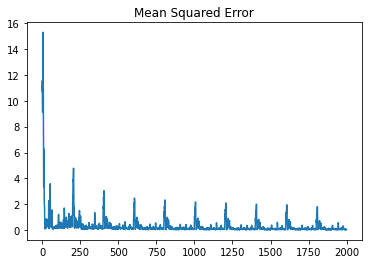

In [ ]:
plt.plot(losses)
plt.title("Mean Squared Error")
plt.show()

- Test

first predicted hour tensor([[0.0140, 1.5823, 0.9525, 0.6505]], device='cuda:0')
is equal to  [0.01400476 1.5822971  0.9525308  0.6504798 ]
Epoch [10/10], Step [10/69], Loss: 0.0438
Epoch [10/10], Step [20/69], Loss: 0.0988
Epoch [10/10], Step [30/69], Loss: 0.0580
Epoch [10/10], Step [40/69], Loss: 0.0504
Epoch [10/10], Step [50/69], Loss: 0.1891
Epoch [10/10], Step [60/69], Loss: 0.2475


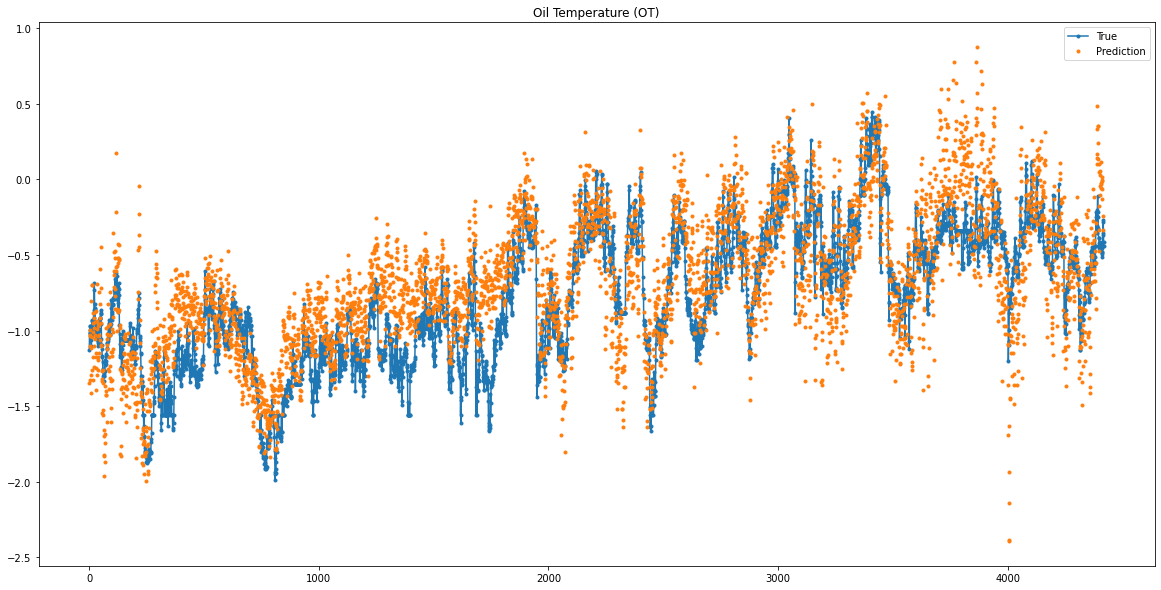

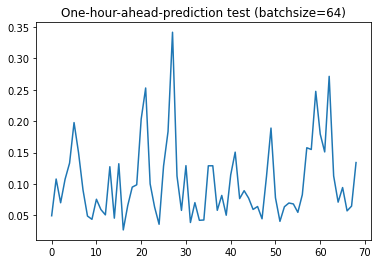

In [ ]:
test_pred = np.empty(0,dtype='float32')
test_loss = []
for i, x in enumerate(test_loader):   # Load a batch of images with its (index, )
    if torch.cuda.is_available():
        x = x.cuda()
    if i == 0:
        first_pred_time = x[0,-1:,:4]
        print('first predicted hour', first_pred_time) # get first predicted time data 
        print('is equal to ', df[13000,:4])
    x_out = x[:,-1:,-1:].detach().clone() # use most recent time 'OT' as output
    x_in_enc = x[:,:-1,:].transpose(1,2) # drop most recent time data, swap time and feature
    x_in_dec = x[:,1:,:].transpose(1,2) # from time 1 to current time
    # Warning: the following will zero out the corresponding entries in x since it is refering the same ram address
    x_in_dec[:,-1:,-1:]=0 # use year, month, day, hour as decoding feature, zero out other feature at current time

    predict = model(x_in_enc, x_in_enc )[:,-1:,-1:]                  #  compute the output class given an input
    error = loss(predict, x_out)              # Compute the loss: difference between the output and the pre-given label
    test_loss.append(error.detach().to("cpu").item())
    test_pred = np.concatenate((test_pred, predict.detach().to("cpu").squeeze().numpy()))

    if (i+1) % 10 == 0:                              # Logging
        print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                %(epoch+1, num_epochs, i+1, len(testdata)//batch_size, error.item())) 


test_true = df[13000:,-1:]
t =0
plt.figure(figsize=(20,10))
plt.plot(test_true[t:],'.-', label='True')
plt.plot(test_pred[t:],'.', label='Prediction')
plt.title('Oil Temperature (OT)')
plt.legend()
plt.show()   

plt.plot(test_loss)
plt.title('One-hour-ahead-prediction test (batchsize=64)')
plt.show()

### Training 1 (LINEAR_END = True)

 This has the old time as deconding feature (no current time information)


- Training setup

In [ ]:
# we want attention performed on the time-axis, i.e. data attend history
model = TimeTransformer(d_linear = 11, # dim of attention output used as input for linear layer
                        nhead=1,
                        d_model= time_step-1, #attention head size
                        d_out = 1,
                        dim_feedforward = time_step-1,
                        num_encoder_layers=3, 
                        num_decoder_layers=4,
                        dropout=0.1,
                        linear_end = True,
                        batch_first=True)  #  input and output dim = (batch, seq, feature)
if torch.cuda.is_available():
    model.cuda()


# empty cache
torch.cuda.empty_cache() 
# keep track of loss during training
losses = []

In [ ]:
num_epochs = 10
learning_rate = 1e-5
loss = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
# attend to history data
for epoch in range(num_epochs):
    for i, x in enumerate(train_loader):   # Load a batch with its (index, )
        # x has dimension [batch, time, feature]
        if torch.cuda.is_available():
            x = x.cuda()
        x_out = x[:,-1:,-1:].detach().clone() # use most recent time 'OT' as output
        x_in_enc = x[:,:-1,:].transpose(1,2) # drop most recent time data, swap time and feature

        optimizer.zero_grad()                             # Intialize the hidden weight to all zeros
        outputs = model(x_in_enc, x_in_enc )                             # Forward pass: compute the output class given a image
        error = loss(outputs, x_out)                 # Compute the loss: difference between the output class and the pre-given label
        error.backward()                                   # Backward pass: compute the weight
        optimizer.step()                                  # Optimizer: update the weights of hidden nodes

        losses.append(error.detach().to("cpu").item())

        if (i) % 50 == 0:                              # Logging
            print('Epoch [%d/%d], Step [%d/%d], Loss: %.6f'
                  %(epoch+1, num_epochs, i+1, len(traindata)//batch_size, error.item()))


Epoch [1/10], Step [1/200], Loss: 5.240788
Epoch [1/10], Step [51/200], Loss: 0.529979
Epoch [1/10], Step [101/200], Loss: 0.769344
Epoch [1/10], Step [151/200], Loss: 0.416684
Epoch [2/10], Step [1/200], Loss: 5.184214
Epoch [2/10], Step [51/200], Loss: 0.361092
Epoch [2/10], Step [101/200], Loss: 0.438671
Epoch [2/10], Step [151/200], Loss: 0.385022
Epoch [3/10], Step [1/200], Loss: 4.831925
Epoch [3/10], Step [51/200], Loss: 0.327439
Epoch [3/10], Step [101/200], Loss: 0.676121
Epoch [3/10], Step [151/200], Loss: 0.397113
Epoch [4/10], Step [1/200], Loss: 4.618362
Epoch [4/10], Step [51/200], Loss: 0.415356
Epoch [4/10], Step [101/200], Loss: 0.490543
Epoch [4/10], Step [151/200], Loss: 0.281424
Epoch [5/10], Step [1/200], Loss: 4.604242
Epoch [5/10], Step [51/200], Loss: 0.355973
Epoch [5/10], Step [101/200], Loss: 0.558586
Epoch [5/10], Step [151/200], Loss: 0.426690
Epoch [6/10], Step [1/200], Loss: 5.418898
Epoch [6/10], Step [51/200], Loss: 0.354150
Epoch [6/10], Step [101/200]

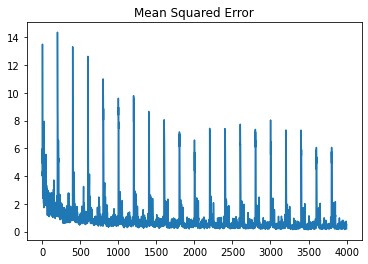

In [ ]:
plt.plot(losses)
plt.title("Mean Squared Error")
plt.show()

- Test

first predicted hour tensor([[0.0140, 1.5823, 0.9525, 0.6505]], device='cuda:0')
is equal to  [0.01400476 1.5822971  0.9525308  0.6504798 ]
Epoch [10/10], Step [10/69], Loss: 0.2052
Epoch [10/10], Step [20/69], Loss: 0.1904
Epoch [10/10], Step [30/69], Loss: 0.5806
Epoch [10/10], Step [40/69], Loss: 0.4456
Epoch [10/10], Step [50/69], Loss: 0.8465
Epoch [10/10], Step [60/69], Loss: 0.5723


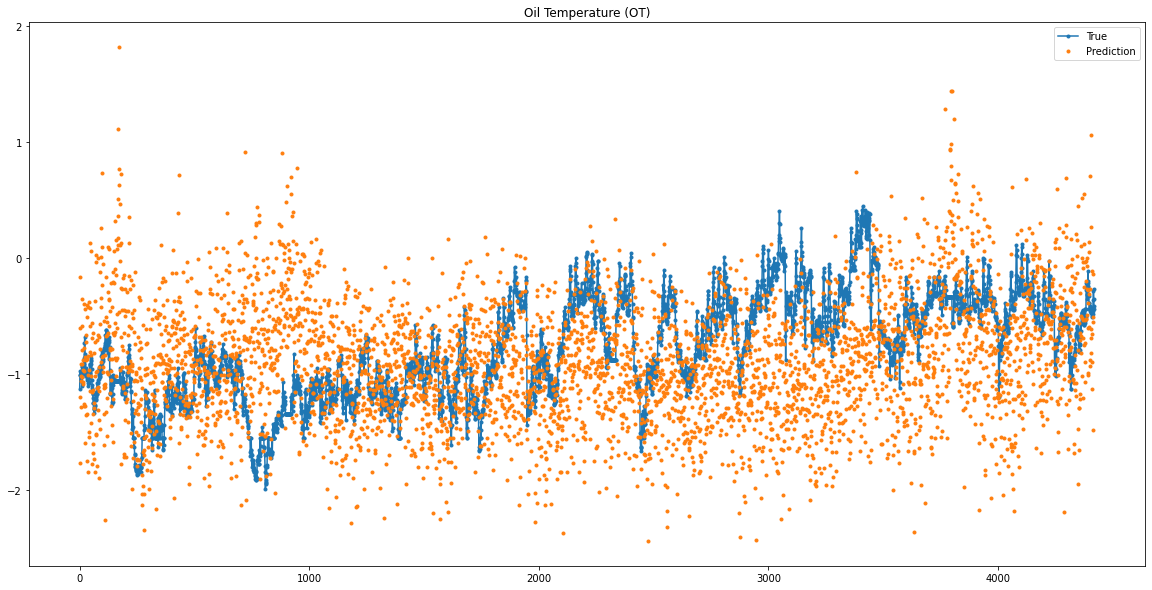

In [ ]:
test_pred = np.empty(0,dtype='float32')
test_loss = []
for i, x in enumerate(test_loader):   # Load a batch of images with its (index, )
    if torch.cuda.is_available():
        x = x.cuda()
    if i == 0:
        first_pred_time = x[0,-1:,:4]
        print('first predicted hour', first_pred_time) # get first predicted time data 
        print('is equal to ', df[13000,:4])
    x_out = x[:,-1:,-1:].detach().clone() # use most recent time 'OT' as output
    x_in_enc = x[:,:-1,:].transpose(1,2) # drop most recent time data, swap time and feature

    predict = model(x_in_enc, x_in_enc )                  #  compute the output class given an input
    error = loss(predict, x_out)              # Compute the loss: difference between the output and the pre-given label
    test_loss.append(error.detach().to("cpu").item())
    x = predict.detach().to("cpu").squeeze().numpy()
    test_pred = np.concatenate((test_pred, x))

    if (i+1) % 10 == 0:                              # Logging
        print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                %(epoch+1, num_epochs, i+1, len(testdata)//batch_size, error.item()))  

test_true = df[13000:,-1:]
t =0
plt.figure(figsize=(20,10))
plt.plot(test_true[t:],'.-', label='True')
plt.plot(test_pred[t:],'.', label='Prediction')
plt.title('Oil Temperature (OT)')
plt.legend()
plt.show()  

### Train 1-2 (LINEAR_END = True)

Another model: has the most recent date as deconding feature

In [ ]:
# we want attention performed on the time-axis, i.e. data attend history
model = TimeTransformer(d_linear = 11, # dim of attention output used as input for linear layer
                        nhead=1,
                        d_model= time_step-1, #attention head size
                        d_out = 1,
                        dim_feedforward = time_step-1,
                        num_encoder_layers=3, 
                        num_decoder_layers=6,
                        dropout=0.1, 
                        linear_end = True,
                        batch_first=True)  #  input and output dim = (batch, seq, feature)
if torch.cuda.is_available():
    model.cuda()


# empty cache
torch.cuda.empty_cache() 
# keep track of loss during training
losses = []

Epoch [1/10], Step [1/200], Loss: 4.974764
Epoch [1/10], Step [101/200], Loss: 0.482585
Epoch [2/10], Step [1/200], Loss: 5.327952
Epoch [2/10], Step [101/200], Loss: 0.518362
Epoch [3/10], Step [1/200], Loss: 5.356291
Epoch [3/10], Step [101/200], Loss: 0.525159
Epoch [4/10], Step [1/200], Loss: 4.850383
Epoch [4/10], Step [101/200], Loss: 0.470150
Epoch [5/10], Step [1/200], Loss: 5.141970
Epoch [5/10], Step [101/200], Loss: 0.481952
Epoch [6/10], Step [1/200], Loss: 4.537804
Epoch [6/10], Step [101/200], Loss: 0.501317
Epoch [7/10], Step [1/200], Loss: 3.444703
Epoch [7/10], Step [101/200], Loss: 0.464494
Epoch [8/10], Step [1/200], Loss: 3.582684
Epoch [8/10], Step [101/200], Loss: 0.378321
Epoch [9/10], Step [1/200], Loss: 2.843691
Epoch [9/10], Step [101/200], Loss: 0.360805
Epoch [10/10], Step [1/200], Loss: 3.142616
Epoch [10/10], Step [101/200], Loss: 0.376283


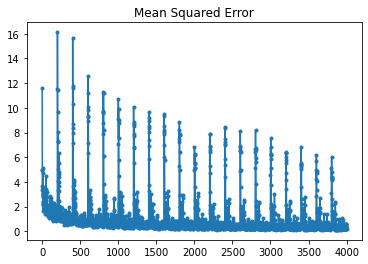

In [ ]:
num_epochs = 10
learning_rate = 1e-5
loss = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
# attend to history data
for epoch in range(num_epochs):
    for i, x in enumerate(train_loader):   # Load a batch with its (index, )
        # x has dimension [batch, time, feature]
        # add Positional encoding:
        #x += original_PE(time_step, d_model=7)
        if torch.cuda.is_available():
            x = x.cuda()
        x_out = x[:,-1:,-1:].detach().clone() # use most recent time 'OT' as output
        x_in_enc = x[:,:-1,:].transpose(1,2) # drop most recent time data, swap time and feature
        x_in_dec = x[:,1:,:].transpose(1,2) # from time 1 to current time
        # Warning: the following will zero out the corresponding entries in x since it is refering the same ram address
        x_in_dec[:,-1:,-1:]=0 # use year, month, etc. as decoding feature, zero out other OT at current time

        
        optimizer.zero_grad()                             # Intialize the hidden weight to all zeros
        outputs = model(x_in_enc, x_in_dec )                             # Forward pass: compute the output class given a image
        error = loss(outputs, x_out)                 # Compute the loss: difference between the output class and the pre-given label
        error.backward()                                   # Backward pass: compute the weight
        optimizer.step()                                  # Optimizer: update the weights of hidden nodes
        losses.append(error.detach().to('cpu').numpy())

        if (i) % 100 == 0:                              # Logging
            print('Epoch [%d/%d], Step [%d/%d], Loss: %.6f'
                  %(epoch+1, num_epochs, i+1, len(traindata)//batch_size, error.item()))
plt.plot(losses,'.-')
plt.title("Mean Squared Error")
plt.show()

Test 

first predicted hour tensor([[0.0140, 1.5823, 0.9525, 0.6505]], device='cuda:0')
is equal to  [0.01400476 1.5822971  0.9525308  0.6504798 ]
Epoch [10/10], Step [10/69], Loss: 0.1393
Epoch [10/10], Step [20/69], Loss: 0.2218
Epoch [10/10], Step [30/69], Loss: 0.3913
Epoch [10/10], Step [40/69], Loss: 0.3602
Epoch [10/10], Step [50/69], Loss: 0.8627
Epoch [10/10], Step [60/69], Loss: 0.4886


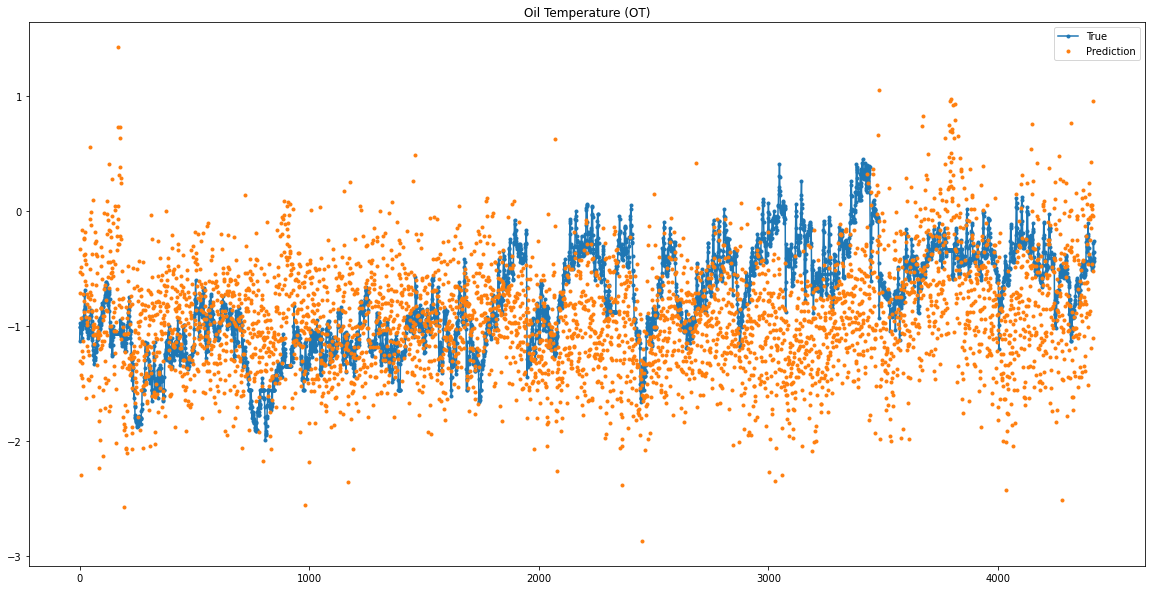

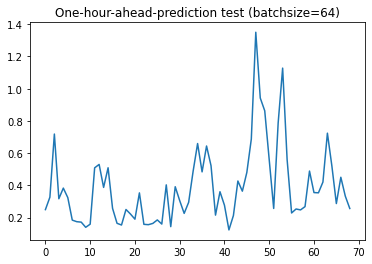

In [ ]:
test_pred = np.empty(0,dtype='float32')
test_loss = []
for i, x in enumerate(test_loader):   # Load a batch of images with its (index, )
    if torch.cuda.is_available():
        x = x.cuda()
    if i == 0:
        first_pred_time = x[0,-1:,:4]
        print('first predicted hour', first_pred_time) # get first predicted time data 
        print('is equal to ', df[13000,:4])
    x_out = x[:,-1:,-1:].detach().clone() # use most recent time 'OT' as output
    x_in_enc = x[:,:-1,:].transpose(1,2) # drop most recent time data, swap time and feature
    x_in_dec = x[:,1:,:].transpose(1,2) # from time 1 to current time
    # Warning: the following will zero out the corresponding entries in x since it is refering the same ram address
    x_in_dec[:,-1:,-1:]=0 # use year, month, day, hour as decoding feature, zero out other feature at current time

    predict = model(x_in_enc, x_in_dec )      #  compute the output class given an input
    error = loss(predict, x_out)              # Compute the loss: difference between the output and the pre-given label
    test_loss.append(error.detach().to("cpu").item())
    test_pred = np.concatenate((test_pred, predict.detach().to("cpu").squeeze().numpy()))

    if (i+1) % 10 == 0:                              # Logging
        print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                %(epoch+1, num_epochs, i+1, len(testdata)//batch_size, error.item())) 


test_true = df[13000:,-1:]

t =0
plt.figure(figsize=(20,10))
plt.plot(test_true[t:],'.-', label='True')
plt.plot(test_pred[t:],'.', label='Prediction')
plt.title('Oil Temperature (OT)')
plt.legend()
plt.show()   

plt.plot(test_loss)
plt.title('One-hour-ahead-prediction test (batchsize=64)')
plt.show()

Linear head is bad at predicting the time series, since it leads to diverging behavior.

# 4-2. Modeling and Training (feature attention)

## attention inside 'torch.nn.functional'

To make n_heads more flexible without the following restrictions: 
   4629     head_dim = embed_dim // num_heads
-> 4630     assert head_dim * num_heads == embed_dim, "embed_dim must be divisible by num_heads"

Alternatively, we can repeat the embeded vectors multiple times

In [ ]:
 # replace torch.nn.functional
#
# multihead attention
#

def _in_projection_packed(
    q: Tensor,
    k: Tensor,
    v: Tensor,
    w: Tensor,
    b: Optional[Tensor] = None,
) -> List[Tensor]:
    r"""
    Performs the in-projection step of the attention operation, using packed weights.
    Output is a triple containing projection tensors for query, key and value.
    Args:
        q, k, v: query, key and value tensors to be projected. For self-attention,
            these are typically the same tensor; for encoder-decoder attention,
            k and v are typically the same tensor. (We take advantage of these
            identities for performance if they are present.) Regardless, q, k and v
            must share a common embedding dimension; otherwise their shapes may vary.
        w: projection weights for q, k and v, packed into a single tensor. Weights
            are packed along dimension 0, in q, k, v order.
        b: optional projection biases for q, k and v, packed into a single tensor
            in q, k, v order.
    Shape:
        Inputs:
        - q: :math:`(..., E)` where E is the embedding dimension
        - k: :math:`(..., E)` where E is the embedding dimension
        - v: :math:`(..., E)` where E is the embedding dimension
        - w: :math:`(E * 3, E)` where E is the embedding dimension
        - b: :math:`E * 3` where E is the embedding dimension
        Output:
        - in output list :math:`[q', k', v']`, each output tensor will have the
            same shape as the corresponding input tensor.
    """
    E = q.size(-1)
    if k is v:
        if q is k:
            # self-attention
            return linear(q, w, b).chunk(3, dim=-1)
        else:
            # encoder-decoder attention
            w_q, w_kv = w.split([E, E * 2])
            if b is None:
                b_q = b_kv = None
            else:
                b_q, b_kv = b.split([E, E * 2])
            return (linear(q, w_q, b_q),) + linear(k, w_kv, b_kv).chunk(2, dim=-1)
    else:
        w_q, w_k, w_v = w.chunk(3)
        if b is None:
            b_q = b_k = b_v = None
        else:
            b_q, b_k, b_v = b.chunk(3)
        return linear(q, w_q, b_q), linear(k, w_k, b_k), linear(v, w_v, b_v)


def _in_projection(
    q: Tensor,
    k: Tensor,
    v: Tensor,
    w_q: Tensor,
    w_k: Tensor,
    w_v: Tensor,
    b_q: Optional[Tensor] = None,
    b_k: Optional[Tensor] = None,
    b_v: Optional[Tensor] = None,
) -> Tuple[Tensor, Tensor, Tensor]:
    r"""
    Performs the in-projection step of the attention operation. This is simply
    a triple of linear projections, with shape constraints on the weights which
    ensure embedding dimension uniformity in the projected outputs.
    Output is a triple containing projection tensors for query, key and value.
    Args:
        q, k, v: query, key and value tensors to be projected.
        w_q, w_k, w_v: weights for q, k and v, respectively.
        b_q, b_k, b_v: optional biases for q, k and v, respectively.
    Shape:
        Inputs:
        - q: :math:`(Qdims..., Eq)` where Eq is the query embedding dimension and Qdims are any
            number of leading dimensions.
        - k: :math:`(Kdims..., Ek)` where Ek is the key embedding dimension and Kdims are any
            number of leading dimensions.
        - v: :math:`(Vdims..., Ev)` where Ev is the value embedding dimension and Vdims are any
            number of leading dimensions.
        - w_q: :math:`(Eq, Eq)`
        - w_k: :math:`(Eq, Ek)`
        - w_v: :math:`(Eq, Ev)`
        - b_q: :math:`(Eq)`
        - b_k: :math:`(Eq)`
        - b_v: :math:`(Eq)`
        Output: in output triple :math:`(q', k', v')`,
         - q': :math:`[Qdims..., Eq]`
         - k': :math:`[Kdims..., Eq]`
         - v': :math:`[Vdims..., Eq]`
    """
    Eq, Ek, Ev = q.size(-1), k.size(-1), v.size(-1)
    assert w_q.shape == (Eq, Eq), f"expecting query weights shape of {(Eq, Eq)}, but got {w_q.shape}"
    assert w_k.shape == (Eq, Ek), f"expecting key weights shape of {(Eq, Ek)}, but got {w_k.shape}"
    assert w_v.shape == (Eq, Ev), f"expecting value weights shape of {(Eq, Ev)}, but got {w_v.shape}"
    assert b_q is None or b_q.shape == (Eq,), f"expecting query bias shape of {(Eq,)}, but got {b_q.shape}"
    assert b_k is None or b_k.shape == (Eq,), f"expecting key bias shape of {(Eq,)}, but got {b_k.shape}"
    assert b_v is None or b_v.shape == (Eq,), f"expecting value bias shape of {(Eq,)}, but got {b_v.shape}"
    return linear(q, w_q, b_q), linear(k, w_k, b_k), linear(v, w_v, b_v)


def _scaled_dot_product_attention(
    q: Tensor,
    k: Tensor,
    v: Tensor,
    attn_mask: Optional[Tensor] = None,
    dropout_p: float = 0.0,
) -> Tuple[Tensor, Tensor]:
    r"""
    Computes scaled dot product attention on query, key and value tensors, using
    an optional attention mask if passed, and applying dropout if a probability
    greater than 0.0 is specified.
    Returns a tensor pair containing attended values and attention weights.
    Args:
        q, k, v: query, key and value tensors. See Shape section for shape details.
        attn_mask: optional tensor containing mask values to be added to calculated
            attention. May be 2D or 3D; see Shape section for details.
        dropout_p: dropout probability. If greater than 0.0, dropout is applied.
    Shape:
        - q: :math:`(B, Nt, E)` where B is batch size, Nt is the target sequence length,
            and E is embedding dimension.
        - key: :math:`(B, Ns, E)` where B is batch size, Ns is the source sequence length,
            and E is embedding dimension.
        - value: :math:`(B, Ns, E)` where B is batch size, Ns is the source sequence length,
            and E is embedding dimension.
        - attn_mask: either a 3D tensor of shape :math:`(B, Nt, Ns)` or a 2D tensor of
            shape :math:`(Nt, Ns)`.
        - Output: attention values have shape :math:`(B, Nt, E)`; attention weights
            have shape :math:`(B, Nt, Ns)`
    """
    B, Nt, E = q.shape
    q = q / math.sqrt(E)
    # (B, Nt, E) x (B, E, Ns) -> (B, Nt, Ns)
    attn = torch.bmm(q, k.transpose(-2, -1))
    if attn_mask is not None:
        attn += attn_mask
    attn = softmax(attn, dim=-1)
    if dropout_p > 0.0:
        attn = dropout(attn, p=dropout_p)
    # (B, Nt, Ns) x (B, Ns, E) -> (B, Nt, E)
    output = torch.bmm(attn, v)
    return output, attn


def multi_head_attention_forward(
    query: Tensor,
    key: Tensor,
    value: Tensor,
    embed_dim_to_check: int,
    num_heads: int,
    in_proj_weight: Tensor,
    in_proj_bias: Optional[Tensor],
    bias_k: Optional[Tensor],
    bias_v: Optional[Tensor],
    add_zero_attn: bool,
    dropout_p: float,
    out_proj_weight: Tensor,
    out_proj_bias: Optional[Tensor],
    training: bool = True,
    key_padding_mask: Optional[Tensor] = None,
    need_weights: bool = True,
    attn_mask: Optional[Tensor] = None,
    use_separate_proj_weight: bool = False,
    q_proj_weight: Optional[Tensor] = None,
    k_proj_weight: Optional[Tensor] = None,
    v_proj_weight: Optional[Tensor] = None,
    static_k: Optional[Tensor] = None,
    static_v: Optional[Tensor] = None,
) -> Tuple[Tensor, Optional[Tensor]]:
    r"""
    Args:
        query, key, value: map a query and a set of key-value pairs to an output.
            See "Attention Is All You Need" for more details.
        embed_dim_to_check: total dimension of the model.
        num_heads: parallel attention heads.
        in_proj_weight, in_proj_bias: input projection weight and bias.
        bias_k, bias_v: bias of the key and value sequences to be added at dim=0.
        add_zero_attn: add a new batch of zeros to the key and
                       value sequences at dim=1.
        dropout_p: probability of an element to be zeroed.
        out_proj_weight, out_proj_bias: the output projection weight and bias.
        training: apply dropout if is ``True``.
        key_padding_mask: if provided, specified padding elements in the key will
            be ignored by the attention. This is an binary mask. When the value is True,
            the corresponding value on the attention layer will be filled with -inf.
        need_weights: output attn_output_weights.
        attn_mask: 2D or 3D mask that prevents attention to certain positions. A 2D mask will be broadcasted for all
            the batches while a 3D mask allows to specify a different mask for the entries of each batch.
        use_separate_proj_weight: the function accept the proj. weights for query, key,
            and value in different forms. If false, in_proj_weight will be used, which is
            a combination of q_proj_weight, k_proj_weight, v_proj_weight.
        q_proj_weight, k_proj_weight, v_proj_weight, in_proj_bias: input projection weight and bias.
        static_k, static_v: static key and value used for attention operators.
    Shape:
        Inputs:
        - query: :math:`(L, N, E)` where L is the target sequence length, N is the batch size, E is
          the embedding dimension.
        - key: :math:`(S, N, E)`, where S is the source sequence length, N is the batch size, E is
          the embedding dimension.
        - value: :math:`(S, N, E)` where S is the source sequence length, N is the batch size, E is
          the embedding dimension.
        - key_padding_mask: :math:`(N, S)` where N is the batch size, S is the source sequence length.
          If a ByteTensor is provided, the non-zero positions will be ignored while the zero positions
          will be unchanged. If a BoolTensor is provided, the positions with the
          value of ``True`` will be ignored while the position with the value of ``False`` will be unchanged.
        - attn_mask: 2D mask :math:`(L, S)` where L is the target sequence length, S is the source sequence length.
          3D mask :math:`(N*num_heads, L, S)` where N is the batch size, L is the target sequence length,
          S is the source sequence length. attn_mask ensures that position i is allowed to attend the unmasked
          positions. If a ByteTensor is provided, the non-zero positions are not allowed to attend
          while the zero positions will be unchanged. If a BoolTensor is provided, positions with ``True``
          are not allowed to attend while ``False`` values will be unchanged. If a FloatTensor
          is provided, it will be added to the attention weight.
        - static_k: :math:`(N*num_heads, S, E/num_heads)`, where S is the source sequence length,
          N is the batch size, E is the embedding dimension. E/num_heads is the head dimension.
        - static_v: :math:`(N*num_heads, S, E/num_heads)`, where S is the source sequence length,
          N is the batch size, E is the embedding dimension. E/num_heads is the head dimension.
        Outputs:
        - attn_output: :math:`(L, N, E)` where L is the target sequence length, N is the batch size,
          E is the embedding dimension.
        - attn_output_weights: :math:`(N, L, S)` where N is the batch size,
          L is the target sequence length, S is the source sequence length.
    """
    tens_ops = (query, key, value, in_proj_weight, in_proj_bias, bias_k, bias_v, out_proj_weight, out_proj_bias)
    if has_torch_function(tens_ops):
        return handle_torch_function(
            multi_head_attention_forward,
            tens_ops,
            query,
            key,
            value,
            embed_dim_to_check,
            num_heads,
            in_proj_weight,
            in_proj_bias,
            bias_k,
            bias_v,
            add_zero_attn,
            dropout_p,
            out_proj_weight,
            out_proj_bias,
            training=training,
            key_padding_mask=key_padding_mask,
            need_weights=need_weights,
            attn_mask=attn_mask,
            use_separate_proj_weight=use_separate_proj_weight,
            q_proj_weight=q_proj_weight,
            k_proj_weight=k_proj_weight,
            v_proj_weight=v_proj_weight,
            static_k=static_k,
            static_v=static_v,
        )

    # set up shape vars
    tgt_len, bsz, embed_dim = query.shape
    src_len, _, _ = key.shape
    assert embed_dim == embed_dim_to_check, \
        f"was expecting embedding dimension of {embed_dim_to_check}, but got {embed_dim}"
    if isinstance(embed_dim, torch.Tensor):
        # embed_dim can be a tensor when JIT tracing
        head_dim = embed_dim.div(num_heads, rounding_mode='trunc')
    else:
        head_dim = embed_dim // num_heads
    assert head_dim * num_heads == embed_dim, f"embed_dim {embed_dim} not divisible by num_heads {num_heads}"
    if use_separate_proj_weight:
        # allow MHA to have different embedding dimensions when separate projection weights are used
        assert key.shape[:2] == value.shape[:2], \
            f"key's sequence and batch dims {key.shape[:2]} do not match value's {value.shape[:2]}"
    else:
        assert key.shape == value.shape, f"key shape {key.shape} does not match value shape {value.shape}"

    #
    # compute in-projection
    #
    if not use_separate_proj_weight:
        q, k, v = _in_projection_packed(query, key, value, in_proj_weight, in_proj_bias)
    else:
        assert q_proj_weight is not None, "use_separate_proj_weight is True but q_proj_weight is None"
        assert k_proj_weight is not None, "use_separate_proj_weight is True but k_proj_weight is None"
        assert v_proj_weight is not None, "use_separate_proj_weight is True but v_proj_weight is None"
        if in_proj_bias is None:
            b_q = b_k = b_v = None
        else:
            b_q, b_k, b_v = in_proj_bias.chunk(3)
        q, k, v = _in_projection(query, key, value, q_proj_weight, k_proj_weight, v_proj_weight, b_q, b_k, b_v)

    # prep attention mask
    if attn_mask is not None:
        if attn_mask.dtype == torch.uint8:
            warnings.warn("Byte tensor for attn_mask in nn.MultiheadAttention is deprecated. Use bool tensor instead.")
            attn_mask = attn_mask.to(torch.bool)
        else:
            assert attn_mask.is_floating_point() or attn_mask.dtype == torch.bool, \
                f"Only float, byte, and bool types are supported for attn_mask, not {attn_mask.dtype}"
        # ensure attn_mask's dim is 3
        if attn_mask.dim() == 2:
            correct_2d_size = (tgt_len, src_len)
            if attn_mask.shape != correct_2d_size:
                raise RuntimeError(f"The shape of the 2D attn_mask is {attn_mask.shape}, but should be {correct_2d_size}.")
            attn_mask = attn_mask.unsqueeze(0)
        elif attn_mask.dim() == 3:
            correct_3d_size = (bsz * num_heads, tgt_len, src_len)
            if attn_mask.shape != correct_3d_size:
                raise RuntimeError(f"The shape of the 3D attn_mask is {attn_mask.shape}, but should be {correct_3d_size}.")
        else:
            raise RuntimeError(f"attn_mask's dimension {attn_mask.dim()} is not supported")

    # prep key padding mask
    if key_padding_mask is not None and key_padding_mask.dtype == torch.uint8:
        warnings.warn("Byte tensor for key_padding_mask in nn.MultiheadAttention is deprecated. Use bool tensor instead.")
        key_padding_mask = key_padding_mask.to(torch.bool)

    # add bias along batch dimension (currently second)
    if bias_k is not None and bias_v is not None:
        assert static_k is None, "bias cannot be added to static key."
        assert static_v is None, "bias cannot be added to static value."
        k = torch.cat([k, bias_k.repeat(1, bsz, 1)])
        v = torch.cat([v, bias_v.repeat(1, bsz, 1)])
        if attn_mask is not None:
            attn_mask = pad(attn_mask, (0, 1))
        if key_padding_mask is not None:
            key_padding_mask = pad(key_padding_mask, (0, 1))
    else:
        assert bias_k is None
        assert bias_v is None

    #
    # reshape q, k, v for multihead attention and make em batch first
    #
    q = q.contiguous().view(tgt_len, bsz * num_heads, head_dim).transpose(0, 1)
    if static_k is None:
        k = k.contiguous().view(-1, bsz * num_heads, head_dim).transpose(0, 1)
    else:
        # TODO finish disentangling control flow so we don't do in-projections when statics are passed
        assert static_k.size(0) == bsz * num_heads, \
            f"expecting static_k.size(0) of {bsz * num_heads}, but got {static_k.size(0)}"
        assert static_k.size(2) == head_dim, \
            f"expecting static_k.size(2) of {head_dim}, but got {static_k.size(2)}"
        k = static_k
    if static_v is None:
        v = v.contiguous().view(-1, bsz * num_heads, head_dim).transpose(0, 1)
    else:
        # TODO finish disentangling control flow so we don't do in-projections when statics are passed
        assert static_v.size(0) == bsz * num_heads, \
            f"expecting static_v.size(0) of {bsz * num_heads}, but got {static_v.size(0)}"
        assert static_v.size(2) == head_dim, \
            f"expecting static_v.size(2) of {head_dim}, but got {static_v.size(2)}"
        v = static_v

    # add zero attention along batch dimension (now first)
    if add_zero_attn:
        zero_attn_shape = (bsz * num_heads, 1, head_dim)
        k = torch.cat([k, torch.zeros(zero_attn_shape, dtype=k.dtype, device=k.device)], dim=1)
        v = torch.cat([v, torch.zeros(zero_attn_shape, dtype=v.dtype, device=v.device)], dim=1)
        if attn_mask is not None:
            attn_mask = pad(attn_mask, (0, 1))
        if key_padding_mask is not None:
            key_padding_mask = pad(key_padding_mask, (0, 1))

    # update source sequence length after adjustments
    src_len = k.size(1)

    # merge key padding and attention masks
    if key_padding_mask is not None:
        assert key_padding_mask.shape == (bsz, src_len), \
            f"expecting key_padding_mask shape of {(bsz, src_len)}, but got {key_padding_mask.shape}"
        key_padding_mask = key_padding_mask.view(bsz, 1, 1, src_len).   \
            expand(-1, num_heads, -1, -1).reshape(bsz * num_heads, 1, src_len)
        if attn_mask is None:
            attn_mask = key_padding_mask
        elif attn_mask.dtype == torch.bool:
            attn_mask = attn_mask.logical_or(key_padding_mask)
        else:
            attn_mask = attn_mask.masked_fill(key_padding_mask, float("-inf"))

    # convert mask to float
    if attn_mask is not None and attn_mask.dtype == torch.bool:
        new_attn_mask = torch.zeros_like(attn_mask, dtype=torch.float)
        new_attn_mask.masked_fill_(attn_mask, float("-inf"))
        attn_mask = new_attn_mask

    # adjust dropout probability
    if not training:
        dropout_p = 0.0

    #
    # (deep breath) calculate attention and out projection
    #
    attn_output, attn_output_weights = _scaled_dot_product_attention(q, k, v, attn_mask, dropout_p)
    attn_output = attn_output.transpose(0, 1).contiguous().view(tgt_len, bsz, embed_dim)
    attn_output = linear(attn_output, out_proj_weight, out_proj_bias)

    if need_weights:
        # average attention weights over heads
        attn_output_weights = attn_output_weights.view(bsz, num_heads, tgt_len, src_len)
        return attn_output, attn_output_weights.sum(dim=1) / num_heads
    else:
        return attn_output, None


NameError: ignored

- Training setup

In [ ]:
# we want attention performed on the time-axis, i.e. data attend history
model = TimeTransformer(d_linear = time_step-1, # linear combine attention output
                        nhead=1,
                        d_model= 11, #attention head size
                        d_out = 1,
                        dim_feedforward = 11,
                        num_encoder_layers=3, 
                        num_decoder_layers=3,
                        dropout=0,
                        batch_first=True)  #  input and output dim = (batch, seq, feature)
if torch.cuda.is_available():
    model.cuda()

loss = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# empty cache
torch.cuda.empty_cache() 
# keep track of loss during training
losses = []

- Training

In [ ]:
num_epochs = 25
learning_rate = 1e-5
# attend to history data
for epoch in range(num_epochs):
    for i, x in enumerate(train_loader):   # Load a batch of images with its (index, )
        # add Positional encoding:
        #x += original_PE(time_step, d_model=7)
        if torch.cuda.is_available():
            x = x.cuda()
        x_in = x[:,:-1,:]
        x_out = x[:,-1:,-1:] # dim=7 x[:,-1:,:]; dim=1 x[:,-1:,-1:]
        optimizer.zero_grad()                             # Intialize the hidden weight to all zeros
        outputs = model(x_in, x_in )                             # Forward pass: compute the output class given a image
        error = loss(outputs, x_out)                 # Compute the loss: difference between the output class and the pre-given label
        error.backward()                                   # Backward pass: compute the weight
        optimizer.step()                                  # Optimizer: update the weights of hidden nodes
        losses.append(error)

        if (i+1) % 50 == 0:                              # Logging
            print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                  %(epoch+1, num_epochs, i+1, len(traindata)//batch_size, error.item()))


Epoch [1/25], Step [50/200], Loss: 38.9384
Epoch [1/25], Step [100/200], Loss: 12.6969
Epoch [1/25], Step [150/200], Loss: 95.1270
Epoch [1/25], Step [200/200], Loss: 9.4944
Epoch [2/25], Step [50/200], Loss: 25.2446
Epoch [2/25], Step [100/200], Loss: 10.3100
Epoch [2/25], Step [150/200], Loss: 73.1103
Epoch [2/25], Step [200/200], Loss: 17.3246
Epoch [3/25], Step [50/200], Loss: 15.8580
Epoch [3/25], Step [100/200], Loss: 11.1938
Epoch [3/25], Step [150/200], Loss: 55.6314
Epoch [3/25], Step [200/200], Loss: 25.5045
Epoch [4/25], Step [50/200], Loss: 9.8108
Epoch [4/25], Step [100/200], Loss: 13.6788
Epoch [4/25], Step [150/200], Loss: 42.2509
Epoch [4/25], Step [200/200], Loss: 32.8077
Epoch [5/25], Step [50/200], Loss: 6.1634
Epoch [5/25], Step [100/200], Loss: 16.6570
Epoch [5/25], Step [150/200], Loss: 32.2714
Epoch [5/25], Step [200/200], Loss: 38.5016
Epoch [6/25], Step [50/200], Loss: 4.1542
Epoch [6/25], Step [100/200], Loss: 19.4793
Epoch [6/25], Step [150/200], Loss: 24.953

KeyboardInterrupt: ignored